### LTFS - Upsell Prediction - Topup 

We will Build a model given the Top-up loan bucket of 128655 customers along with demographic and bureau data, predict the right bucket/period for 14745 customers in the test data.

In this Notebook , We will first take only Customer Demographics Data and identify the important features from given features . Later will add more features from Bureau Data for each of the customer

### Import Libraries 

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
pd.set_option('display.max_columns', None)
%matplotlib inline

### Feature Processing
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from dateutil import relativedelta

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### Metrics
import sklearn.metrics as metrics

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingClassifier

### Data Gathering 

In [ ]:
train_data = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/train_Data.xlsx')
test_data = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')

display(train_data.head())
display(test_data.head())

print(train_data.shape)
print(test_data.shape)

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,365000.0,1000.0,2011-12-29,2015-10-05,2011-12-29,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,285000.0,9300.0,2012-04-28,2016-01-01,2012-04-28,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,400000.0,35800.0,2013-10-22,2017-09-10,2013-10-22,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,500000.0,52000.0,2013-05-21,2016-02-10,2013-05-21,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,400000.0,35400.0,2012-11-30,2016-12-05,2012-11-30,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0


(128655, 26)
(14745, 25)


### Train Dataset

Converting Dependent Variable Categories to Numerical Values 

In [ ]:
train_data['Top-up Month'].value_counts()

No Top-up Service    106677
 > 48 Months           8366
36-48 Months           3656
24-30 Months           3492
30-36 Months           3062
18-24 Months           2368
12-18 Months           1034
Name: Top-up Month, dtype: int64

In [ ]:
top_up_class_label_dict = {
    'No Top-up Service':0,
    ' > 48 Months':1,
    '36-48 Months':2,
    '24-30 Months':3,
    '30-36 Months':4,
    '18-24 Months':5,
    '12-18 Months':6
}
train_data['top_up_class'] = train_data['Top-up Month'].map(top_up_class_label_dict)
display(train_data.head(5))

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month,top_up_class
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months,1
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service,0
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months,6
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months,1
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months,2


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               128655 non-null  int64         
 1   Frequency        128655 non-null  object        
 2   InstlmentMode    128655 non-null  object        
 3   LoanStatus       128655 non-null  object        
 4   PaymentMode      128655 non-null  object        
 5   BranchID         128655 non-null  int64         
 6   Area             117002 non-null  object        
 7   Tenure           128655 non-null  int64         
 8   AssetCost        128655 non-null  int64         
 9   AmountFinance    128655 non-null  float64       
 10  DisbursalAmount  128655 non-null  float64       
 11  EMI              128655 non-null  float64       
 12  DisbursalDate    128655 non-null  datetime64[ns]
 13  MaturityDAte     128654 non-null  datetime64[ns]
 14  AuthDate         128

### Dropping out features which are not usefull 

Which contains all unique values and no pattern can be derived from that attribute

In [ ]:
def find_unique_values_to_drop_out(features):
  for feature in features:
    print(feature + ' : ' , len(train_data[feature].unique()))

find_unique_values_to_drop_out(['ID','AssetID'])

ID :  128655
AssetID :  128655


Since AssesID and ID both have unique values equal to Total length of dataset , we will remove this 2 columns

We will also remove TOP-UP-Month because we have replaced each category to numerical values in top_up_class

In [ ]:
train_data.shape

(128655, 27)

In [ ]:
train_data = train_data.drop(['ID','AssetID','Top-up Month'],axis=1)
display(train_data.head())
print(train_data.shape)

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,1
1,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,0
2,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,6
3,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,1
4,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,2


(128655, 24)


### Exploratory Data Analysis 

##### 1. Missing Values 

In [ ]:
train_data.isnull().sum()

Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
top_up_class           0
dtype: int64

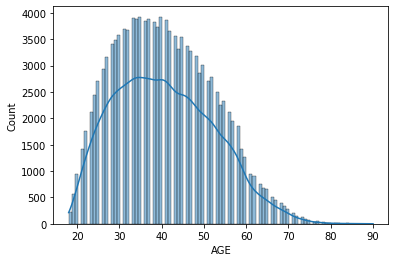

In [ ]:
sns.histplot(train_data['AGE'],kde=True)

In [ ]:
### Fill null values of Age with Median
train_data['AGE'] =train_data['AGE'].fillna(train_data['AGE'].median())
train_data.isnull().sum()

Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                    0
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
top_up_class           0
dtype: int64

In [ ]:
train_data['MonthlyIncome'] =train_data['MonthlyIncome'].fillna(train_data['MonthlyIncome'].median())
train_data.isnull().sum()

Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                    0
MonthlyIncome          0
City               11256
State                  0
ZiPCODE              372
top_up_class           0
dtype: int64

### Replace Zip code value based on State 

In [ ]:
train_data['ZiPCODE'].value_counts()

125001.0    806
125055.0    690
584128.0    524
125050.0    409
334001.0    407
           ... 
583234.0      1
583233.0      1
583215.0      1
244104.0      1
524299.0      1
Name: ZiPCODE, Length: 9123, dtype: int64

First We will identify the Mode value for each state and then replace with Missing Value in ZiPcode

In below example , You can see some states have all unique values and no mode can be found.In that case we will replace our missing value with First value of list like 160036 in Chandigarh

In [ ]:
groupby_state_zipcode = train_data.groupby('State')['ZiPCODE'].agg(pd.Series.mode)
print(type(groupby_state_zipcode))
groupby_state_zipcode

<class 'pandas.core.series.Series'>


State
ANDHRA PRADESH                                                       508204
ASSAM                                                                782124
BIHAR                                                                824112
CHANDIGARH                                             [160036.0, 160101.0]
CHATTISGARH                                                          495001
DADRA AND NAGAR HAVELI                                               396235
DELHI                     [110000.0, 110003.0, 110012.0, 110016.0, 11003...
GUJARAT                                                              383235
HARYANA                                                              125001
HIMACHAL PRADESH                                                     174101
JHARKHAND                                                            833201
KARNATAKA                                                            584128
MADHYA PRADESH                                                       464228
MAHARA

In [ ]:
groupby_state_zipcode['CHANDIGARH']=160036
groupby_state_zipcode['DELHI']=110000
groupby_state_zipcode

State
ANDHRA PRADESH            508204
ASSAM                     782124
BIHAR                     824112
CHANDIGARH                160036
CHATTISGARH               495001
DADRA AND NAGAR HAVELI    396235
DELHI                     110000
GUJARAT                   383235
HARYANA                   125001
HIMACHAL PRADESH          174101
JHARKHAND                 833201
KARNATAKA                 584128
MADHYA PRADESH            464228
MAHARASHTRA               413510
ORISSA                    764074
PUNJAB                    146001
RAJASTHAN                 334001
TAMIL NADU                630551
TELANGANA                 508204
UTTAR PRADESH             261001
UTTARAKHAND               263148
WEST BENGAL               732125
Name: ZiPCODE, dtype: object

Now we will replace null values of ZIPCODE with Above Mode value identified from State

In [ ]:
def impute_zipcode(cols):
  zipcode = cols[0]
  state = cols[1]
  if pd.isnull(zipcode):
    return groupby_state_zipcode[state]
  else:
    return zipcode

In [ ]:
train_data['ZiPCODE'] = train_data[['ZiPCODE','State']].apply(impute_zipcode,axis=1)

In [ ]:
train_data.head(10)

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,1
1,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,0
2,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,6
3,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,1
4,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,2
5,Monthly,Arrear,Closed,Billed,5,RAIPUR,48,400000,280000.0,280000.0,53000.0,2011-12-19,2015-12-15,2011-12-19,1019,54689,70.00,M,40.0,42083.33,RAIPUR,CHATTISGARH,493885.0,0
6,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,716000,450000.0,450000.0,2000.0,2011-12-31,2015-12-05,2011-12-31,1019,54689,62.85,M,23.0,46221.00,RAIPUR,CHATTISGARH,493889.0,0
7,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,600000,360000.0,360000.0,11000.0,2012-02-09,2016-02-15,2012-02-09,1187,21232,60.00,M,41.0,46195.08,RAIPUR,CHATTISGARH,493114.0,0
8,Monthly,Arrear,Closed,PDC,5,RAIPUR,46,539275,400000.0,400000.0,50000.0,2012-03-29,2016-01-15,2012-03-29,1046,24760,74.17,M,51.0,15000.00,RAIPUR,CHATTISGARH,493196.0,0
9,Monthly,Arrear,Closed,PDC,5,RAIPUR,48,689275,490000.0,490000.0,10000.0,2012-03-30,2016-02-15,2012-03-30,1046,24760,71.09,M,33.0,31666.67,RAIPUR,CHATTISGARH,493344.0,0


In [ ]:
train_data.isnull().sum()

Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                    0
MonthlyIncome          0
City               11256
State                  0
ZiPCODE                0
top_up_class           0
dtype: int64

### Sex

In [ ]:
train_data['SEX'].value_counts()

M    122144
F      6452
Name: SEX, dtype: int64

In [ ]:
train_data['SEX'] = train_data['SEX'].fillna(train_data['SEX'].value_counts().index[0])
train_data.isnull().sum()

Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                    0
AGE                    0
MonthlyIncome          0
City               11256
State                  0
ZiPCODE                0
top_up_class           0
dtype: int64

Since Zipcode represents Area and City we can remove both City and Area

In [ ]:
train_data = train_data.drop(['Area','City'],axis=1)
train_data.shape

(128655, 22)

In [ ]:
train_data.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,1568,21946,61.11,M,49.0,35833.33,MADHYA PRADESH,464993.0,1
1,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,1062,34802,70.00,M,23.0,666.67,MADHYA PRADESH,466001.0,0
2,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,1060,127335,69.77,M,39.0,45257.00,MADHYA PRADESH,462030.0,6
3,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,1060,25094,80.92,M,24.0,20833.33,MADHYA PRADESH,473335.0,1
4,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,1046,21853,71.05,M,56.0,27313.67,CHATTISGARH,495442.0,2


#### Maturity Date

We will remove that row

In [ ]:
train_data.dropna(axis=0,inplace=True)
train_data.shape

(128654, 22)

In [ ]:
train_data.index = range(0,len(train_data))
train_data.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,1568,21946,61.11,M,49.0,35833.33,MADHYA PRADESH,464993.0,1
1,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,1062,34802,70.00,M,23.0,666.67,MADHYA PRADESH,466001.0,0
2,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,1060,127335,69.77,M,39.0,45257.00,MADHYA PRADESH,462030.0,6
3,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,1060,25094,80.92,M,24.0,20833.33,MADHYA PRADESH,473335.0,1
4,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,1046,21853,71.05,M,56.0,27313.67,CHATTISGARH,495442.0,2


In [ ]:
train_data.shape

(128654, 22)

In [ ]:
train_data.isnull().sum()

Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
AmountFinance      0
DisbursalAmount    0
EMI                0
DisbursalDate      0
MaturityDAte       0
AuthDate           0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
top_up_class       0
dtype: int64

In [ ]:
train_data.to_excel('train_data_missing_values_handled.xlsx')

In [ ]:
train_data.dtypes

Frequency                  object
InstlmentMode              object
LoanStatus                 object
PaymentMode                object
BranchID                    int64
Tenure                      int64
AssetCost                   int64
AmountFinance             float64
DisbursalAmount           float64
EMI                       float64
DisbursalDate      datetime64[ns]
MaturityDAte       datetime64[ns]
AuthDate           datetime64[ns]
ManufacturerID              int64
SupplierID                  int64
LTV                       float64
SEX                        object
AGE                       float64
MonthlyIncome             float64
State                      object
ZiPCODE                   float64
top_up_class                int64
dtype: object

Since we already have a Feature of Tenure which is Difference of months between Disbursal date and Maturity date , We can remove both columns 

And as said , Disbursal date and Auth Date are almost similar, There is not much variance . We will remove this columns also

In [ ]:
train_data.shape

(128654, 22)

In [ ]:
train_data = train_data.drop(['DisbursalDate','MaturityDAte','AuthDate'],axis=1)
train_data.shape

(128654, 19)

In [ ]:
train_data.dtypes

Frequency           object
InstlmentMode       object
LoanStatus          object
PaymentMode         object
BranchID             int64
Tenure               int64
AssetCost            int64
AmountFinance      float64
DisbursalAmount    float64
EMI                float64
ManufacturerID       int64
SupplierID           int64
LTV                float64
SEX                 object
AGE                float64
MonthlyIncome      float64
State               object
ZiPCODE            float64
top_up_class         int64
dtype: object

### Categorical Variables and Cardinality of Categorical Varaibles 

In [ ]:
categorical_features = ['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode','SEX','State']

### Cardinality of Categorical Variables
for feature in categorical_features:
  print('Feature : {} ------- Number of Unique Categories : {} '.format(feature,len(train_data[feature].unique())))

Feature : Frequency ------- Number of Unique Categories : 4 
Feature : InstlmentMode ------- Number of Unique Categories : 2 
Feature : LoanStatus ------- Number of Unique Categories : 2 
Feature : PaymentMode ------- Number of Unique Categories : 11 
Feature : SEX ------- Number of Unique Categories : 2 
Feature : State ------- Number of Unique Categories : 22 


#### TEST DATA

Before Performing Categorical Encoding , We will do Data preprocessing of Test Data and combine with Train to do final categorical encoding

In [ ]:
test_data.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,365000.0,1000.0,2011-12-29,2015-10-05,2011-12-29,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,285000.0,9300.0,2012-04-28,2016-01-01,2012-04-28,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,400000.0,35800.0,2013-10-22,2017-09-10,2013-10-22,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,500000.0,52000.0,2013-05-21,2016-02-10,2013-05-21,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,400000.0,35400.0,2012-11-30,2016-12-05,2012-11-30,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0


In [ ]:
test_data.shape

(14745, 25)

In [ ]:
test_data = test_data.drop(['ID','AssetID','Area','City','DisbursalDate','MaturityDAte','AuthDate'],axis=1)
test_data.shape

(14745, 18)

In [ ]:
test_data.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE
0,Monthly,Advance,Closed,PDC_E,2,46,480000,365000.0,365000.0,1000.0,1046.0,22354,75.83,M,50.0,32069.00,MADHYA PRADESH,473001.0
1,Monthly,Advance,Closed,PDC,2,45,480000,285000.0,285000.0,9300.0,1046.0,22354,57.44,M,35.0,25000.00,MADHYA PRADESH,473001.0
2,Quatrly,Arrear,Closed,PDC,2,48,580000,400000.0,400000.0,35800.0,1060.0,65929,68.97,M,37.0,23333.33,MADHYA PRADESH,473001.0
3,Half Yearly,Arrear,Closed,Billed,154,36,725000,500000.0,500000.0,52000.0,1049.0,68597,61.79,M,55.0,91666.67,CHATTISGARH,493558.0
4,Quatrly,Arrear,Closed,PDC,194,48,617000,400000.0,400000.0,35400.0,1049.0,38493,59.09,M,48.0,12500.00,ORISSA,754137.0


In [ ]:
test_data.isnull().sum()

Frequency           0
InstlmentMode       0
LoanStatus          0
PaymentMode         0
BranchID            0
Tenure              0
AssetCost           0
AmountFinance       0
DisbursalAmount     0
EMI                 0
ManufacturerID      2
SupplierID          0
LTV                 0
SEX                 5
AGE                 7
MonthlyIncome      14
State               0
ZiPCODE             1
dtype: int64

In [ ]:
test_data['AGE'] =test_data['AGE'].fillna(test_data['AGE'].median())
test_data['MonthlyIncome'] =test_data['MonthlyIncome'].fillna(test_data['MonthlyIncome'].median())
test_data.isnull().sum()

Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
AmountFinance      0
DisbursalAmount    0
EMI                0
ManufacturerID     2
SupplierID         0
LTV                0
SEX                5
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            1
dtype: int64

In [ ]:
test_data['ManufacturerID'].mode()[0]

1049.0

In [ ]:
test_data['ManufacturerID'] = test_data['ManufacturerID'].fillna(test_data['ManufacturerID'].mode()[0])
test_data.isnull().sum()

Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
AmountFinance      0
DisbursalAmount    0
EMI                0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                5
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            1
dtype: int64

In [ ]:
groupby_state_zipcode

State
ANDHRA PRADESH            508204
ASSAM                     782124
BIHAR                     824112
CHANDIGARH                160036
CHATTISGARH               495001
DADRA AND NAGAR HAVELI    396235
DELHI                     110000
GUJARAT                   383235
HARYANA                   125001
HIMACHAL PRADESH          174101
JHARKHAND                 833201
KARNATAKA                 584128
MADHYA PRADESH            464228
MAHARASHTRA               413510
ORISSA                    764074
PUNJAB                    146001
RAJASTHAN                 334001
TAMIL NADU                630551
TELANGANA                 508204
UTTAR PRADESH             261001
UTTARAKHAND               263148
WEST BENGAL               732125
Name: ZiPCODE, dtype: object

In [ ]:
test_data['ZiPCODE'] = test_data[['ZiPCODE','State']].apply(impute_zipcode,axis=1)
test_data.head(20)

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE
0,Monthly,Advance,Closed,PDC_E,2,46,480000,365000.0,365000.0,1000.0,1046.0,22354,75.83,M,50.0,32069.00,MADHYA PRADESH,473001.0
1,Monthly,Advance,Closed,PDC,2,45,480000,285000.0,285000.0,9300.0,1046.0,22354,57.44,M,35.0,25000.00,MADHYA PRADESH,473001.0
2,Quatrly,Arrear,Closed,PDC,2,48,580000,400000.0,400000.0,35800.0,1060.0,65929,68.97,M,37.0,23333.33,MADHYA PRADESH,473001.0
3,Half Yearly,Arrear,Closed,Billed,154,36,725000,500000.0,500000.0,52000.0,1049.0,68597,61.79,M,55.0,91666.67,CHATTISGARH,493558.0
4,Quatrly,Arrear,Closed,PDC,194,48,617000,400000.0,400000.0,35400.0,1049.0,38493,59.09,M,48.0,12500.00,ORISSA,754137.0
5,Quatrly,Arrear,Active,Direct Debit,262,48,636000,400000.0,400000.0,35300.0,1046.0,73027,57.34,F,49.0,41666.67,ORISSA,755045.0
6,Monthly,Arrear,Closed,ECS,194,48,598000,350000.0,350000.0,10261.0,1049.0,38493,56.81,M,31.0,33333.33,ORISSA,753001.0
7,Monthly,Advance,Closed,PDC,9,47,565931,350000.0,350000.0,10200.0,1049.0,23954,60.04,M,53.0,14166.67,WEST BENGAL,713103.0
8,Quatrly,Arrear,Closed,PDC_E,231,48,570876,400000.0,400000.0,37000.0,1019.0,22934,63.59,M,46.0,22000.00,WEST BENGAL,713519.0
9,Monthly,Advance,Closed,PDC_E,10,47,569500,390000.0,390000.0,14000.0,1049.0,20610,66.02,M,25.0,25000.00,WEST BENGAL,722136.0


In [ ]:
test_data.isnull().sum()

Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
AmountFinance      0
DisbursalAmount    0
EMI                0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                5
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
dtype: int64

In [ ]:
test_data['SEX'] = test_data['SEX'].fillna(test_data['SEX'].value_counts().index[0])
test_data.isnull().sum()

Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
AmountFinance      0
DisbursalAmount    0
EMI                0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
dtype: int64

### Categorical varaibles and Cardinality of Test data

In [ ]:
categorical_features = ['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode','SEX','State']

### Cardinality of Categorical Variables
for feature in categorical_features:
  print('Feature : {} ------- Number of Unique Categories : {} '.format(feature,len(test_data[feature].unique())))

Feature : Frequency ------- Number of Unique Categories : 3 
Feature : InstlmentMode ------- Number of Unique Categories : 2 
Feature : LoanStatus ------- Number of Unique Categories : 2 
Feature : PaymentMode ------- Number of Unique Categories : 10 
Feature : SEX ------- Number of Unique Categories : 2 
Feature : State ------- Number of Unique Categories : 18 


In [ ]:
test_data.dtypes

Frequency           object
InstlmentMode       object
LoanStatus          object
PaymentMode         object
BranchID             int64
Tenure               int64
AssetCost            int64
AmountFinance      float64
DisbursalAmount    float64
EMI                float64
ManufacturerID     float64
SupplierID           int64
LTV                float64
SEX                 object
AGE                float64
MonthlyIncome      float64
State               object
ZiPCODE            float64
dtype: object

In [ ]:
train_data.dtypes

Frequency           object
InstlmentMode       object
LoanStatus          object
PaymentMode         object
BranchID             int64
Tenure               int64
AssetCost            int64
AmountFinance      float64
DisbursalAmount    float64
EMI                float64
ManufacturerID       int64
SupplierID           int64
LTV                float64
SEX                 object
AGE                float64
MonthlyIncome      float64
State               object
ZiPCODE            float64
top_up_class         int64
dtype: object

In [ ]:
print(train_data.shape)
print(test_data.shape)

(128654, 19)
(14745, 18)


In [ ]:
final_df = pd.concat([train_data,test_data],axis=0)
final_df.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,275000.0,24000.0,1568.0,21946,61.11,M,49.0,35833.33,MADHYA PRADESH,464993.0,1.0
1,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,350000.0,10500.0,1062.0,34802,70.00,M,23.0,666.67,MADHYA PRADESH,466001.0,0.0
2,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,519728.0,38300.0,1060.0,127335,69.77,M,39.0,45257.00,MADHYA PRADESH,462030.0,6.0
3,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,400000.0,11600.0,1060.0,25094,80.92,M,24.0,20833.33,MADHYA PRADESH,473335.0,1.0
4,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,440000.0,15000.0,1046.0,21853,71.05,M,56.0,27313.67,CHATTISGARH,495442.0,2.0


In [ ]:
final_df.shape

(143399, 19)

In [ ]:
categorical_features = ['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode','SEX','State']

### Cardinality of Categorical Variables
for feature in categorical_features:
  print('Feature : {} ------- Number of Unique Categories : {} '.format(feature,len(final_df[feature].unique())))

Feature : Frequency ------- Number of Unique Categories : 4 
Feature : InstlmentMode ------- Number of Unique Categories : 2 
Feature : LoanStatus ------- Number of Unique Categories : 2 
Feature : PaymentMode ------- Number of Unique Categories : 11 
Feature : SEX ------- Number of Unique Categories : 2 
Feature : State ------- Number of Unique Categories : 22 


In [ ]:
final_df.dtypes

Frequency           object
InstlmentMode       object
LoanStatus          object
PaymentMode         object
BranchID             int64
Tenure               int64
AssetCost            int64
AmountFinance      float64
DisbursalAmount    float64
EMI                float64
ManufacturerID     float64
SupplierID           int64
LTV                float64
SEX                 object
AGE                float64
MonthlyIncome      float64
State               object
ZiPCODE            float64
top_up_class       float64
dtype: object

In [ ]:
train_data.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,top_up_class
0,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,275000.0,24000.0,1568,21946,61.11,M,49.0,35833.33,MADHYA PRADESH,464993.0,1
1,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,350000.0,10500.0,1062,34802,70.00,M,23.0,666.67,MADHYA PRADESH,466001.0,0
2,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,519728.0,38300.0,1060,127335,69.77,M,39.0,45257.00,MADHYA PRADESH,462030.0,6
3,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,400000.0,11600.0,1060,25094,80.92,M,24.0,20833.33,MADHYA PRADESH,473335.0,1
4,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,440000.0,15000.0,1046,21853,71.05,M,56.0,27313.67,CHATTISGARH,495442.0,2


In [ ]:
final_df = pd.get_dummies(final_df,drop_first=True)
final_df.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568.0,21946,61.11,49.0,35833.33,464993.0,1.0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062.0,34802,70.00,23.0,666.67,466001.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060.0,127335,69.77,39.0,45257.00,462030.0,6.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060.0,25094,80.92,24.0,20833.33,473335.0,1.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046.0,21853,71.05,56.0,27313.67,495442.0,2.0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
categorical_features = ['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode','SEX','State']

### Cardinality of Categorical Variables
for feature in categorical_features:
  print(train_data[feature].value_counts())

Half Yearly    76248
Monthly        31149
Quatrly        20795
BI-Monthly       462
Name: Frequency, dtype: int64
Arrear     122348
Advance      6306
Name: InstlmentMode, dtype: int64
Closed    94456
Active    34198
Name: LoanStatus, dtype: int64
Direct Debit    31766
ECS             31390
PDC             26617
Billed          26485
PDC_E            9937
Auto Debit        843
SI Reject         744
Cheque            442
ECS Reject        417
Escrow              7
PDC Reject          6
Name: PaymentMode, dtype: int64
M    122202
F      6452
Name: SEX, dtype: int64
MADHYA PRADESH            19121
ANDHRA PRADESH            18629
UTTAR PRADESH             14449
KARNATAKA                 11569
GUJARAT                   10088
RAJASTHAN                  9668
MAHARASHTRA                9083
HARYANA                    9060
PUNJAB                     6420
WEST BENGAL                5557
CHATTISGARH                5448
BIHAR                      3913
TELANGANA                  2783
ORISSA         

In [ ]:
final_df.shape

(143399, 50)

In [ ]:
final_df.iloc[128653:128658,:]

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
128653,424,24,370000,200428.0,200428.0,59200.0,1568.0,48879,54.17,33.0,178166.67,131402.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2,46,480000,365000.0,365000.0,1000.0,1046.0,22354,75.83,50.0,32069.00,473001.0,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,45,480000,285000.0,285000.0,9300.0,1046.0,22354,57.44,35.0,25000.00,473001.0,NaN,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,48,580000,400000.0,400000.0,35800.0,1060.0,65929,68.97,37.0,23333.33,473001.0,NaN,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,154,36,725000,500000.0,500000.0,52000.0,1049.0,68597,61.79,55.0,91666.67,493558.0,NaN,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df.to_excel('combined_df_after_encoding.xlsx')

In [ ]:
zip_code_dict = final_df['ZiPCODE'].value_counts().to_dict()

In [ ]:
final_df.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568.0,21946,61.11,49.0,35833.33,464993.0,1.0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062.0,34802,70.00,23.0,666.67,466001.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060.0,127335,69.77,39.0,45257.00,462030.0,6.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060.0,25094,80.92,24.0,20833.33,473335.0,1.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046.0,21853,71.05,56.0,27313.67,495442.0,2.0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df_zip_encoded = final_df.copy()
final_df_zip_encoded['ZiPCODE'] = final_df_zip_encoded['ZiPCODE'].map(zip_code_dict)

In [ ]:
final_df_zip_encoded.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568.0,21946,61.11,49.0,35833.33,45,1.0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062.0,34802,70.00,23.0,666.67,130,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060.0,127335,69.77,39.0,45257.00,24,6.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060.0,25094,80.92,24.0,20833.33,130,1.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046.0,21853,71.05,56.0,27313.67,6,2.0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df_zip_encoded.to_excel('combined_df_zip_encoded.xlsx')

In [ ]:
final_df_zip_encoded.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568.0,21946,61.11,49.0,35833.33,45,1.0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062.0,34802,70.00,23.0,666.67,130,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060.0,127335,69.77,39.0,45257.00,24,6.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060.0,25094,80.92,24.0,20833.33,130,1.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046.0,21853,71.05,56.0,27313.67,6,2.0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568.0,21946,61.11,49.0,35833.33,464993.0,1.0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062.0,34802,70.00,23.0,666.67,466001.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060.0,127335,69.77,39.0,45257.00,462030.0,6.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060.0,25094,80.92,24.0,20833.33,473335.0,1.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046.0,21853,71.05,56.0,27313.67,495442.0,2.0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(final_df)

143399

In [ ]:
final_df.index = range(0,len(final_df))

In [ ]:
final_df.iloc[128653:128658,:]

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
128653,424,24,370000,200428.0,200428.0,59200.0,1568.0,48879,54.17,33.0,178166.67,131402.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
128654,2,46,480000,365000.0,365000.0,1000.0,1046.0,22354,75.83,50.0,32069.00,473001.0,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
128655,2,45,480000,285000.0,285000.0,9300.0,1046.0,22354,57.44,35.0,25000.00,473001.0,NaN,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
128656,2,48,580000,400000.0,400000.0,35800.0,1060.0,65929,68.97,37.0,23333.33,473001.0,NaN,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
128657,154,36,725000,500000.0,500000.0,52000.0,1049.0,68597,61.79,55.0,91666.67,493558.0,NaN,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data_final = final_df.iloc[:128654,:]
test_data_final = final_df.iloc[128654:,:]

In [ ]:
train_data_final.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568.0,21946,61.11,49.0,35833.33,464993.0,1.0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062.0,34802,70.00,23.0,666.67,466001.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060.0,127335,69.77,39.0,45257.00,462030.0,6.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060.0,25094,80.92,24.0,20833.33,473335.0,1.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046.0,21853,71.05,56.0,27313.67,495442.0,2.0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data_final['top_up_class'] = train_data_final['top_up_class'].astype(int)
train_data_final.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568.0,21946,61.11,49.0,35833.33,464993.0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062.0,34802,70.00,23.0,666.67,466001.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060.0,127335,69.77,39.0,45257.00,462030.0,6,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060.0,25094,80.92,24.0,20833.33,473335.0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046.0,21853,71.05,56.0,27313.67,495442.0,2,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data_final.head(10)

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568.0,21946,61.11,49.0,35833.33,464993.0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062.0,34802,70.00,23.0,666.67,466001.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060.0,127335,69.77,39.0,45257.00,462030.0,6,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060.0,25094,80.92,24.0,20833.33,473335.0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046.0,21853,71.05,56.0,27313.67,495442.0,2,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,48,400000,280000.0,280000.0,53000.0,1019.0,54689,70.00,40.0,42083.33,493885.0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5,48,716000,450000.0,450000.0,2000.0,1019.0,54689,62.85,23.0,46221.00,493889.0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,5,48,600000,360000.0,360000.0,11000.0,1187.0,21232,60.00,41.0,46195.08,493114.0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,46,539275,400000.0,400000.0,50000.0,1046.0,24760,74.17,51.0,15000.00,493196.0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,5,48,689275,490000.0,490000.0,10000.0,1046.0,24760,71.09,33.0,31666.67,493344.0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data_final.dtypes

BranchID                          int64
Tenure                            int64
AssetCost                         int64
AmountFinance                   float64
DisbursalAmount                 float64
EMI                             float64
ManufacturerID                  float64
SupplierID                        int64
LTV                             float64
AGE                             float64
MonthlyIncome                   float64
ZiPCODE                         float64
top_up_class                      int64
Frequency_Half Yearly             uint8
Frequency_Monthly                 uint8
Frequency_Quatrly                 uint8
InstlmentMode_Arrear              uint8
LoanStatus_Closed                 uint8
PaymentMode_Billed                uint8
PaymentMode_Cheque                uint8
PaymentMode_Direct Debit          uint8
PaymentMode_ECS                   uint8
PaymentMode_ECS Reject            uint8
PaymentMode_Escrow                uint8
PaymentMode_PDC                   uint8


In [ ]:
test_data_final = test_data_final.drop('top_up_class',axis=1)
test_data_final.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
128654,2,46,480000,365000.0,365000.0,1000.0,1046.0,22354,75.83,50.0,32069.00,473001.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
128655,2,45,480000,285000.0,285000.0,9300.0,1046.0,22354,57.44,35.0,25000.00,473001.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
128656,2,48,580000,400000.0,400000.0,35800.0,1060.0,65929,68.97,37.0,23333.33,473001.0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
128657,154,36,725000,500000.0,500000.0,52000.0,1049.0,68597,61.79,55.0,91666.67,493558.0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
128658,194,48,617000,400000.0,400000.0,35400.0,1049.0,38493,59.09,48.0,12500.00,754137.0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
test_data_final.index = range(0,len(test_data_final))
test_data_final.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,2,46,480000,365000.0,365000.0,1000.0,1046.0,22354,75.83,50.0,32069.00,473001.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,45,480000,285000.0,285000.0,9300.0,1046.0,22354,57.44,35.0,25000.00,473001.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,48,580000,400000.0,400000.0,35800.0,1060.0,65929,68.97,37.0,23333.33,473001.0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,154,36,725000,500000.0,500000.0,52000.0,1049.0,68597,61.79,55.0,91666.67,493558.0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,194,48,617000,400000.0,400000.0,35400.0,1049.0,38493,59.09,48.0,12500.00,754137.0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
print(train_data_final.shape)
print(test_data_final.shape)

(128654, 50)
(14745, 49)


In [ ]:
train_data_final.to_excel('train_data_final.xlsx')

In [ ]:
test_data_final.to_excel('test_data_final.xlsx')

### Model Training - First Version

In [ ]:
train_data_final.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568.0,21946,61.11,49.0,35833.33,464993.0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062.0,34802,70.00,23.0,666.67,466001.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060.0,127335,69.77,39.0,45257.00,462030.0,6,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060.0,25094,80.92,24.0,20833.33,473335.0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046.0,21853,71.05,56.0,27313.67,495442.0,2,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data_final.shape

(128654, 50)

In [ ]:
y = train_data_final['top_up_class']
X = train_data_final.drop('top_up_class',axis=1)

print(X.shape)
print(y.shape)

(128654, 49)
(128654,)


In [ ]:
X.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568.0,21946,61.11,49.0,35833.33,464993.0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062.0,34802,70.00,23.0,666.67,466001.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060.0,127335,69.77,39.0,45257.00,462030.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060.0,25094,80.92,24.0,20833.33,473335.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046.0,21853,71.05,56.0,27313.67,495442.0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    1
1    0
2    6
3    1
4    2
Name: top_up_class, dtype: int64

In [ ]:
test_data_final.head()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,2,46,480000,365000.0,365000.0,1000.0,1046.0,22354,75.83,50.0,32069.00,473001.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,45,480000,285000.0,285000.0,9300.0,1046.0,22354,57.44,35.0,25000.00,473001.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,48,580000,400000.0,400000.0,35800.0,1060.0,65929,68.97,37.0,23333.33,473001.0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,154,36,725000,500000.0,500000.0,52000.0,1049.0,68597,61.79,55.0,91666.67,493558.0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,194,48,617000,400000.0,400000.0,35400.0,1049.0,38493,59.09,48.0,12500.00,754137.0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 49) (25731, 49) (102923,) (25731,)


### Model Building on dataset which is not scaled

In [ ]:
#creating a dictionary of the models(estimators) 
estimators = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Support Vector Regression':[SVC()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=100)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators, X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression fitted
KNN fitted
Decision Tree fitted
Support Vector Regression fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


In [ ]:
#applying the fitted models to the test dataset
def mpredict(estimators, X_test, y_test):
    outcome = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome

outcome = mpredict(estimators, X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificat

In [ ]:
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome[m][0],4))
    print('Accuracy Score', round(outcome[m][1],4))
    print('Classification report \n ')
    print(outcome[m][2])
    print('\n')

------------------------Logistic Regression------------------------
F1 Score 0.1293
Accuracy Score 0.827
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     21279
           1       0.00      0.00      0.00      1642
           2       0.00      0.00      0.00       761
           3       0.00      0.00      0.00       683
           4       0.00      0.00      0.00       663
           5       0.00      0.00      0.00       502
           6       0.00      0.00      0.00       201

    accuracy                           0.83     25731
   macro avg       0.12      0.14      0.13     25731
weighted avg       0.68      0.83      0.75     25731



------------------------KNN------------------------
F1 Score 0.138
Accuracy Score 0.8195
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     21279
           1       0.17      0.02      0.04     

### Applying Standard Scaling 

In [ ]:
train_new = pd.read_excel('/content/train_data_final.xlsx')
test_new = pd.read_excel('/content/test_data_final.xlsx')
display(train_new.head())
display(test_new.head())

,Unnamed: 0,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,0,1,48,450000,275000.0,275000.0,24000.0,1568,21946,61.11,49,35833.33,464993,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,333,47,485000,350000.0,350000.0,10500.0,1062,34802,70.00,23,666.67,466001,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,1,68,690000,519728.0,519728.0,38300.0,1060,127335,69.77,39,45257.00,462030,6,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,125,48,480000,400000.0,400000.0,11600.0,1060,25094,80.92,24,20833.33,473335,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,152,44,619265,440000.0,440000.0,15000.0,1046,21853,71.05,56,27313.67,495442,2,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Unnamed: 0,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,0,2,46,480000,365000.0,365000.0,1000.0,1046,22354,75.83,50,32069.00,473001,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,2,45,480000,285000.0,285000.0,9300.0,1046,22354,57.44,35,25000.00,473001,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,2,48,580000,400000.0,400000.0,35800.0,1060,65929,68.97,37,23333.33,473001,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,154,36,725000,500000.0,500000.0,52000.0,1049,68597,61.79,55,91666.67,493558,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,194,48,617000,400000.0,400000.0,35400.0,1049,38493,59.09,48,12500.00,754137,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
print(train_new.shape,test_new.shape)

(128654, 51) (14745, 50)


In [ ]:
train_new = train_new.iloc[:,1:]
test_new = test_new.iloc[:,1:]

display(train_new.head())
display(test_new.head())

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568,21946,61.11,49,35833.33,464993,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062,34802,70.00,23,666.67,466001,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060,127335,69.77,39,45257.00,462030,6,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060,25094,80.92,24,20833.33,473335,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046,21853,71.05,56,27313.67,495442,2,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,2,46,480000,365000.0,365000.0,1000.0,1046,22354,75.83,50,32069.00,473001,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,45,480000,285000.0,285000.0,9300.0,1046,22354,57.44,35,25000.00,473001,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,48,580000,400000.0,400000.0,35800.0,1060,65929,68.97,37,23333.33,473001,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,154,36,725000,500000.0,500000.0,52000.0,1049,68597,61.79,55,91666.67,493558,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,194,48,617000,400000.0,400000.0,35400.0,1049,38493,59.09,48,12500.00,754137,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
print(train_new.shape,test_new.shape)

(128654, 50) (14745, 49)


In [ ]:
y = train_new['top_up_class']
X = train_new.drop('top_up_class',axis=1)

display(X.head())
print(X.shape)

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,PaymentMode_Billed,PaymentMode_Cheque,PaymentMode_Direct Debit,PaymentMode_ECS,PaymentMode_ECS Reject,PaymentMode_Escrow,PaymentMode_PDC,PaymentMode_PDC Reject,PaymentMode_PDC_E,PaymentMode_SI Reject,SEX_M,State_ASSAM,State_BIHAR,State_CHANDIGARH,State_CHATTISGARH,State_DADRA AND NAGAR HAVELI,State_DELHI,State_GUJARAT,State_HARYANA,State_HIMACHAL PRADESH,State_JHARKHAND,State_KARNATAKA,State_MADHYA PRADESH,State_MAHARASHTRA,State_ORISSA,State_PUNJAB,State_RAJASTHAN,State_TAMIL NADU,State_TELANGANA,State_UTTAR PRADESH,State_UTTARAKHAND,State_WEST BENGAL
0,1,48,450000,275000.0,275000.0,24000.0,1568,21946,61.11,49,35833.33,464993,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,333,47,485000,350000.0,350000.0,10500.0,1062,34802,70.00,23,666.67,466001,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,68,690000,519728.0,519728.0,38300.0,1060,127335,69.77,39,45257.00,462030,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,125,48,480000,400000.0,400000.0,11600.0,1060,25094,80.92,24,20833.33,473335,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,152,44,619265,440000.0,440000.0,15000.0,1046,21853,71.05,56,27313.67,495442,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(128654, 49)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 49) (25731, 49) (102923,) (25731,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
estimators_st = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=100)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators_st, X_train, y_train):
    for m in estimators_st:
        estimators_st[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators_st, X_train_st, y_train)

def mpredict(estimators_st, X_test_st, y_test):
    outcome = dict()
    for m in estimators_st:
        y_pred = estimators_st[m][0].predict(X_test_st)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome


outcome_st = mpredict(estimators_st, X_test_st, y_test)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression fitted
KNN fitted
Decision Tree fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------Logistic Regression------------------------
F1 Score 0.1303
Accuracy Score 0.8269
Classification report 
 


NameError: ignored

In [ ]:
estimators_st

{'Cat Boost': [<catboost.core.CatBoostClassifier at 0x7fa8f1f10358>],
 'Decision Tree': [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')],
 'Gradient Boosting': [GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=

In [ ]:
for m in outcome_st:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome_st[m][0],4))
    print('Accuracy Score', round(outcome_st[m][1],4))
    print('Classification report \n ')
    print(outcome_st[m][2])
    print('\n')

------------------------Logistic Regression------------------------
F1 Score 0.1303
Accuracy Score 0.8269
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     21279
           1       0.00      0.00      0.00      1642
           2       0.00      0.00      0.00       761
           3       0.00      0.00      0.00       683
           4       1.00      0.00      0.00       663
           5       0.17      0.00      0.00       502
           6       0.00      0.00      0.00       201

    accuracy                           0.83     25731
   macro avg       0.28      0.14      0.13     25731
weighted avg       0.71      0.83      0.75     25731



------------------------KNN------------------------
F1 Score 0.1515
Accuracy Score 0.815
Classification report 
 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     21279
           1       0.19      0.03      0.05    

In [ ]:
print(X.shape,y.shape)

(128654, 49) (128654,)


In [ ]:
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(test_new)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df.shape

(14745, 25)

In [ ]:
submission_df['Pred'] = list(y_pred)
submission_df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Pred
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,365000.0,1000.0,2011-12-29,2015-10-05,2011-12-29,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0,0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,285000.0,9300.0,2012-04-28,2016-01-01,2012-04-28,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0,0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,400000.0,35800.0,2013-10-22,2017-09-10,2013-10-22,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0,0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,500000.0,52000.0,2013-05-21,2016-02-10,2013-05-21,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0,0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,400000.0,35400.0,2012-11-30,2016-12-05,2012-11-30,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0,0


In [ ]:
sub = submission_df[['ID','Pred']]
sub.head()

,ID,Pred
0,4,0
1,5,0
2,6,0
3,25,0
4,119,0


In [ ]:
sub.columns = ['ID','Top-up Month']
sub.head()

,ID,Top-up Month
0,4,0
1,5,0
2,6,0
3,25,0
4,119,0


In [ ]:
sub['Top-up Month'].value_counts()

0    14714
1       17
3       11
5        2
4        1
Name: Top-up Month, dtype: int64

In [ ]:
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,ID,Top-up Month,Top-up Month_Final
0,4,0,No Top-up Service
1,5,0,No Top-up Service
2,6,0,No Top-up Service
3,25,0,No Top-up Service
4,119,0,No Top-up Service


In [ ]:
sub = sub.drop('Top-up Month',axis=1)
sub.head()

,ID,Top-up Month_Final
0,4,No Top-up Service
1,5,No Top-up Service
2,6,No Top-up Service
3,25,No Top-up Service
4,119,No Top-up Service


In [ ]:
sub.columns = ['ID','Top-up Month']
sub.head()

,ID,Top-up Month
0,4,No Top-up Service
1,5,No Top-up Service
2,6,No Top-up Service
3,25,No Top-up Service
4,119,No Top-up Service


In [ ]:
sub['Top-up Month'].value_counts()

No Top-up Service    14714
 > 48 Months            17
24-30 Months            11
18-24 Months             2
30-36 Months             1
Name: Top-up Month, dtype: int64

In [ ]:
sub.to_csv('submit_final.csv',index=False)

### Decision Tree Classifier - Hyper parameter

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 49) (25731, 49) (102923,) (25731,)


In [ ]:
f1 = metrics.make_scorer(metrics.f1_score,average='macro')

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=f1,error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: ignored

In [ ]:
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = list(y_pred)
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

In [ ]:
sub.to_csv('submit_final.csv',index=False)

In [ ]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf=RandomForestClassifier()
xg=XGBClassifier()
gbm=GradientBoostingClassifier()
lgbm=LGBMClassifier()
catboost=CatBoostClassifier(verbose=0, n_estimators=100)

Ens = VotingClassifier( 
    estimators= [('DecisionTreeClassifier',dt),('KNeighborsClassifier',knn),('RandomForestClassifier',rf),('XGBClassifier',xg),('GBM',gbm),('Lgbm',lgbm),('Catboost',catboost)],voting='soft')

## Training the Ensemble learning:
Ens= Ens.fit(X_train_st , y_train)

y_pred = Ens.predict(X_test_st)
print('------------------------COMBINED MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')